In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [51]:
# Load dataset
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',
                 low_memory=False,
                 na_values='?',
                 parse_dates=[[0, 1]],  # combine Date and Time
                 infer_datetime_format=True)

# Rename columns
df.columns = ['datetime', 'global_active_power', 'global_reactive_power',
              'voltage', 'global_intensity', 'sub_metering_1',
              'sub_metering_2', 'sub_metering_3']

# Convert datetime and set index
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12696\2977297186.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('household_power_consumption.txt',
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12696\2977297186.py:2: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('household_power_consumption.txt',
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_12696\2977297186.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('household_power_consumption.txt',


In [52]:
df['hour'] = df.index.hour
df['day'] = df.index.day
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df = pd.get_dummies(df, columns=['hour'], prefix='hour')
df.drop('hour_0', axis=1, inplace=True)  # Avoid dummy trap
df.shape

(2049280, 33)

In [53]:
X = df.drop('global_active_power', axis=1)
y = df['global_active_power']


In [54]:
hour_cols = [col for col in X.columns if col.startswith('hour_')]

for col in hour_cols:
    X[col] = X[col].astype(int)


In [56]:
X.shape
X.value_counts
X

,global_reactive_power,voltage,global_intensity,sub_metering_1,sub_metering_2,sub_metering_3,day,weekday,month,hour_1,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2006-12-16 17:24:00,0.418,234.84,18.4,0.0,1.0,17.0,16,5,12,0,...,0,0,0,1,0,0,0,0,0,0
2006-12-16 17:25:00,0.436,233.63,23.0,0.0,1.0,16.0,16,5,12,0,...,0,0,0,1,0,0,0,0,0,0
2006-12-16 17:26:00,0.498,233.29,23.0,0.0,2.0,17.0,16,5,12,0,...,0,0,0,1,0,0,0,0,0,0
2006-12-16 17:27:00,0.502,233.74,23.0,0.0,1.0,17.0,16,5,12,0,...,0,0,0,1,0,0,0,0,0,0
2006-12-16 17:28:00,0.528,235.68,15.8,0.0,1.0,17.0,16,5,12,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.000,240.43,4.0,0.0,0.0,0.0,26,4,11,0,...,0,0,0,0,0,0,1,0,0,0
2010-11-26 20:59:00,0.000,240.00,4.0,0.0,0.0,0.0,26,4,11,0,...,0,0,0,0,0,0,1,0,0,0
2010-11-26 21:00:00,0.000,239.82,3.8,0.0,0.0,0.0,26,4,11,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
model = LinearRegression()
preds = cross_val_predict(model, X, y, cv=5)  # Cross-validated predictions


In [59]:
residuals = y - preds

residuals

datetime
2006-12-16 17:24:00   -0.094280
2006-12-16 17:25:00   -0.031576
2006-12-16 17:26:00   -0.007316
2006-12-16 17:27:00    0.005136
2006-12-16 17:28:00   -0.011292
                         ...   
2010-11-26 20:58:00   -0.006992
2010-11-26 20:59:00   -0.007039
2010-11-26 21:00:00    0.029811
2010-11-26 21:01:00    0.026356
2010-11-26 21:02:00    0.025037
Name: global_active_power, Length: 2049280, dtype: float64

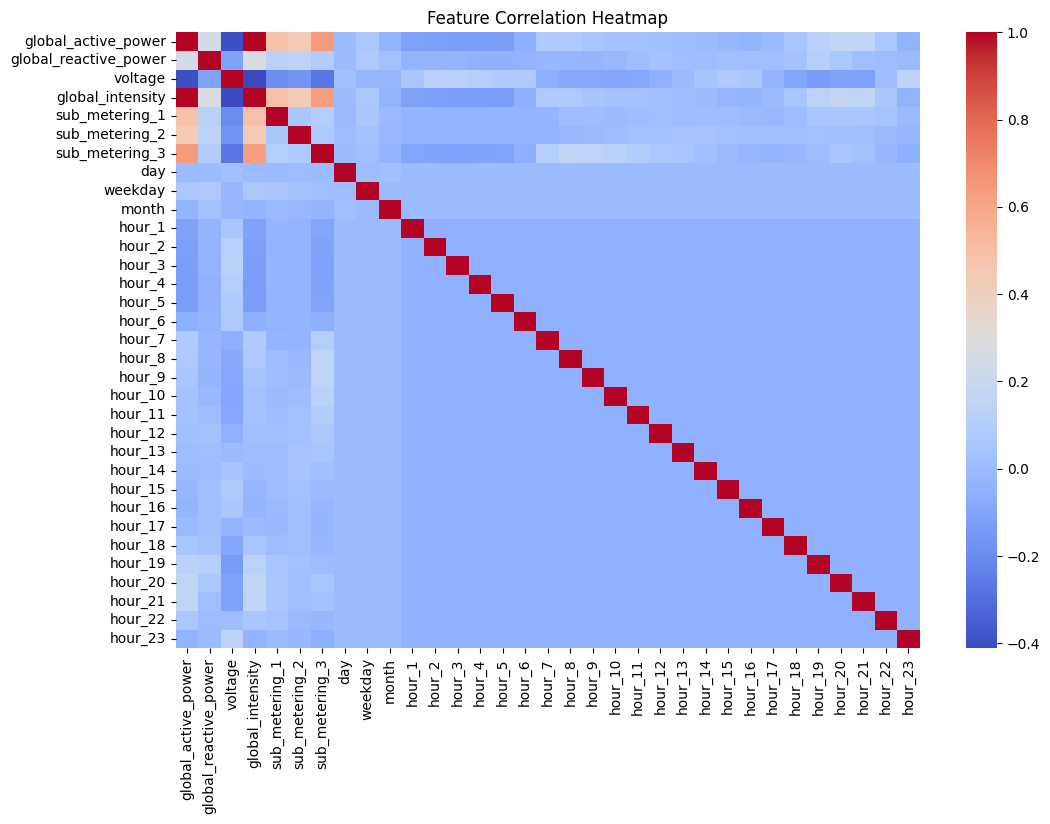

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

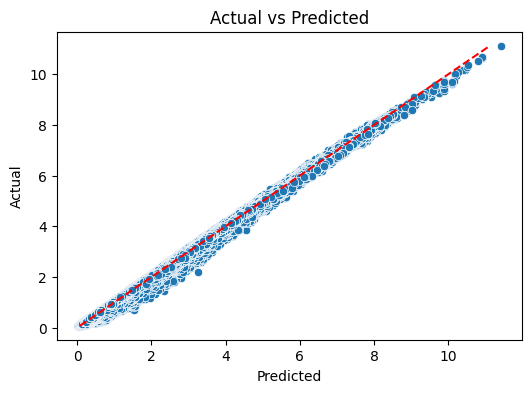

In [62]:
#OLS Assumption !: Linearity Check
plt.figure(figsize=(6, 4))
sns.scatterplot(x=preds, y=y)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Actual vs Predicted")
plt.show()



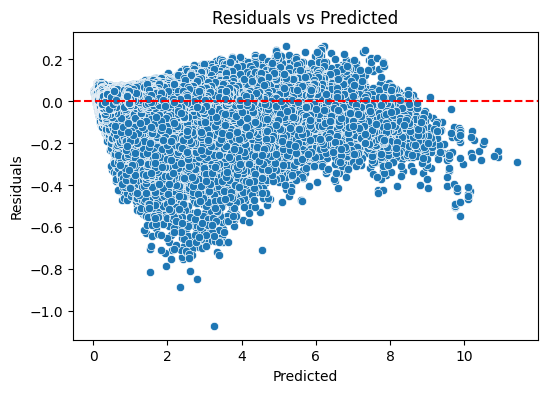

In [63]:
#OLS Assumption 2: Homoscedasticity (residuals vs predicted)
plt.figure(figsize=(6, 4))
sns.scatterplot(x=preds, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()



In [65]:
#OLS Assumption 3: No Multicollinearity (Using VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                  Feature        VIF
0   global_reactive_power   2.449461
1                 voltage  33.302887
2        global_intensity   9.242730
3          sub_metering_1   1.742089
4          sub_metering_2   1.679195
5          sub_metering_3   3.940808
6                     day   4.191837
7                 weekday   3.270335
8                   month   4.561923
9                  hour_1   1.990703
10                 hour_2   1.998331
11                 hour_3   1.999482
12                 hour_4   1.996257
13                 hour_5   1.992993
14                 hour_6   1.994788
15                 hour_7   2.041645
16                 hour_8   2.043982
17                 hour_9   2.042132
18                hour_10   2.025832
19                hour_11   2.014321
20                hour_12   2.011438
21                hour_13   2.009933
22                hour_14   2.010732
23                hour_15   2.006636
24                hour_16   1.998961
25                hour_17   1.989888
2

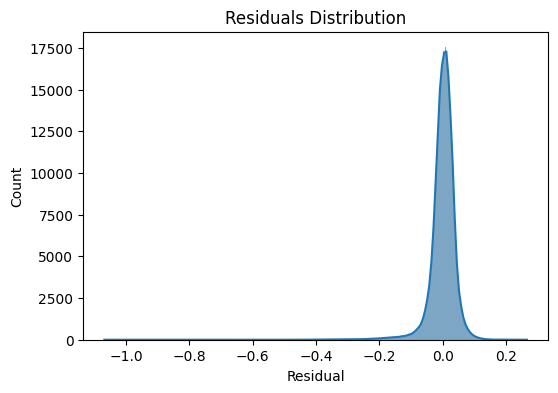

In [67]:
#Assumption 4: Normality of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual")
plt.show()


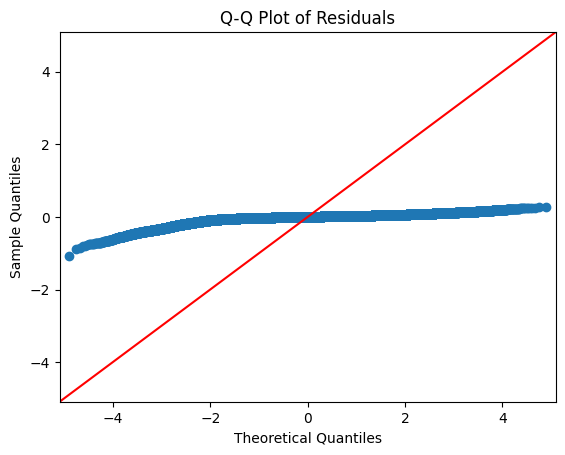

In [68]:
#Assumption 4: Normality of residuals (QQ Plot)
import scipy.stats as stats
import statsmodels.api as sm

sm.qqplot(residuals, line='45')
plt.title("Q-Q Plot of Residuals")
plt.show()

In [69]:
#XGBoost Model
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

r2_score(y_test, y_pred), mean_squared_error(y_test, y_pred)

(0.9991947464112828, 0.0009050595223237123)